In [7]:
import pandas as pd

# Učitavanje cijelog dataset-a iz CSV datoteke
data = pd.read_csv('peaches_200.csv')


# Podjela dataset-a na dva dijela (prvih 100 za dan 1, sljedećih 100 za dan 2)
day1_data = data.iloc[:100].copy()  # Kopiramo podatke za day1
day2_data = data.iloc[100:200].copy()  # Kopiramo podatke za day2

# Izračunavanje Density za svaki dan
day1_data['Density'] = day1_data['mass'] / day1_data['volume']
day2_data['Density'] = day2_data['mass'] / day2_data['volume']

# Pregled prvih nekoliko redaka za day1
print("Prvih nekoliko redaka day1_data:")
print(day1_data.head())
# Pregled prvih nekoliko redaka za day2
print("\nPrvih nekoliko redaka day2_data:")
print(day2_data.head())

# Osnovne informacije o day1_data
print("\nInformacije o day1_data:")
print(day1_data.info())

# Osnovne informacije o day2_data
print("\nInformacije o day2_data:")
print(day2_data.info())

# Osnovne deskriptivne statistike za day1_data
print("\nDeskriptivne statistike day1_data:")
print(day1_data.describe())

# Osnovne deskriptivne statistike za day2_data
print("\nDeskriptivne statistike day2_data:")
print(day2_data.describe())


Prvih nekoliko redaka day1_data:
   Number      volume    mass  Firmness   TST       TA      Zs       θ    L1  \
0       1  125.057211  155.48    1.2225   9.9  0.85090  0.8045 -40.190  2761   
1       2  125.344606  159.66    0.4250  10.8  0.81070  0.7156 -34.704  2450   
2       3  119.723892  149.45    0.5175  11.1  0.77050  0.9087 -37.240  2646   
3       4  131.544574  155.17    1.4775   9.5  0.85894  1.2193 -44.060  2669   
4       5  130.360056  152.13    0.5700   9.8  0.88038  0.9166 -38.313  3086   

     A1    B1    L2    A2    B2   Density  
0  1474  1116  4306  1574  2500  1.243271  
1  1154   749  5541  1313  3305  1.273768  
2  1215   985  4850  1529  3362  1.248289  
3   811   602  6215   486  4341  1.179600  
4  1397  1315  6229   884  4272  1.166999  

Prvih nekoliko redaka day2_data:
     Number      volume    mass  Firmness   TST       TA      Zs       θ  \
100       1  122.177620  150.56    1.6300  10.2  1.03850  1.1785 -41.710   
101       2  120.032472  149.44    3

In [8]:
# Srednje vrijednosti za day1_data
print("Srednje vrijednosti za day1_data:")
print(day1_data.mean())

# Medijan za day1_data
print("\nMedijan za day1_data:")
print(day1_data.median())

# Standardna devijacija za day1_data
print("\nStandardna devijacija za day1_data:")
print(day1_data.std())

# Srednje vrijednosti za day2_data
print("\nSrednje vrijednosti za day2_data:")
print(day2_data.mean())

# Medijan za day2_data
print("\nMedijan za day2_data:")
print(day2_data.median())

# Standardna devijacija za day2_data
print("\nStandardna devijacija za day2_data:")
print(day2_data.std())


Srednje vrijednosti za day1_data:
Number        50.500000
volume       122.756874
mass         154.314400
Firmness       2.001650
TST           10.853000
TA             0.821554
Zs             1.136628
θ            -38.985580
L1          2480.690000
A1           725.830000
B1           568.190000
L2          5230.330000
A2          1372.790000
B2          3571.480000
Density        1.260017
dtype: float64

Medijan za day1_data:
Number        50.500000
volume       122.535128
mass         154.315000
Firmness       1.476250
TST           10.800000
TA             0.821420
Zs             1.089600
θ            -38.579000
L1          2382.000000
A1           642.500000
B1           445.500000
L2          5310.000000
A2          1439.000000
B2          3651.000000
Density        1.252784
dtype: float64

Standardna devijacija za day1_data:
Number       29.011492
volume        5.861344
mass          3.838883
Firmness      1.431501
TST           0.962473
TA            0.093910
Zs            0.21

In [9]:
from scipy.stats import ttest_ind

# Pretpostavljamo da imate podatke podijeljene na day1 i day2 kao u prethodnom primjeru

# T-test za gustoću
t_stat, p_val = ttest_ind(day1_data['Density'], day2_data['Density'])

# Ispis rezultata
print(f'T-test za gustoću: t-stat={t_stat}, p-val={p_val}')

# Tumačenje rezultata
alpha = 0.05  # Postavljamo razinu značajnosti na 0.05
if p_val < alpha:
    print("Postoji statistički značajna razlika u gustoći breskvi prvog i drugog dana.")
else:
    print("Nema dovoljno dokaza za odbacivanje nulte hipoteze o jednakosti gustoće breskvi prvog i drugog dana.")

# T-test za čvrstoću
t_stat_firmness, p_val_firmness = ttest_ind(day1_data['Firmness'], day2_data['Firmness'])
print(f'T-test za čvrstoću: t-stat={t_stat_firmness}, p-val={p_val_firmness}')

# Tumačenje rezultata za čvrstoću
if p_val_firmness < alpha:
    print("Postoji statistički značajna razlika u čvrstoći breskvi prvog i drugog dana.")
else:
    print("Nema dovoljno dokaza za odbacivanje nulte hipoteze o jednakosti čvrstoće breskvi prvog i drugog dana.")



T-test za gustoću: t-stat=-0.8112997468233222, p-val=0.4181677356458464
Nema dovoljno dokaza za odbacivanje nulte hipoteze o jednakosti gustoće breskvi prvog i drugog dana.
T-test za čvrstoću: t-stat=0.5105841570271585, p-val=0.610211044970929
Nema dovoljno dokaza za odbacivanje nulte hipoteze o jednakosti čvrstoće breskvi prvog i drugog dana.


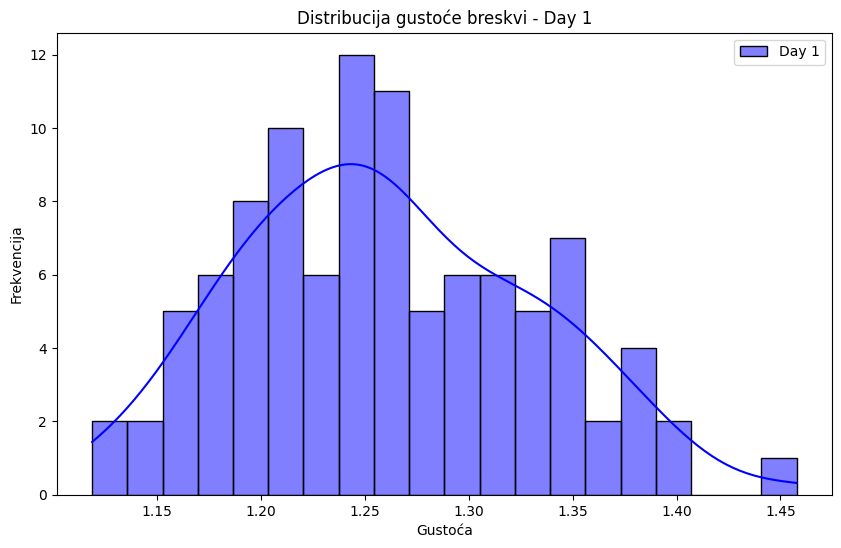

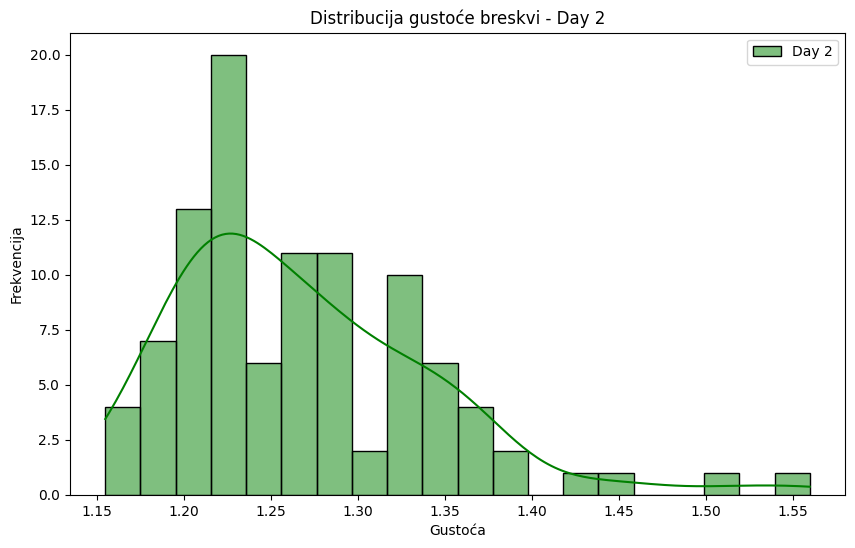

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram gustoće za day1
plt.figure(figsize=(10, 6))
sns.histplot(day1_data['Density'], bins=20, kde=True, color='blue', label='Day 1')
plt.title('Distribucija gustoće breskvi - Day 1')
plt.xlabel('Gustoća')
plt.ylabel('Frekvencija')
plt.legend()
plt.show()

# Histogram gustoće za day2
plt.figure(figsize=(10, 6))
sns.histplot(day2_data['Density'], bins=20, kde=True, color='green', label='Day 2')
plt.title('Distribucija gustoće breskvi - Day 2')
plt.xlabel('Gustoća')
plt.ylabel('Frekvencija')
plt.legend()
plt.show()


C:\Users\mateo\AppData\Local\Temp\ipykernel_16296\660974998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='Density', data=pd.concat([day1_data.assign(day='Day 1'), day2_data.assign(day='Day 2')]), palette='Set2')


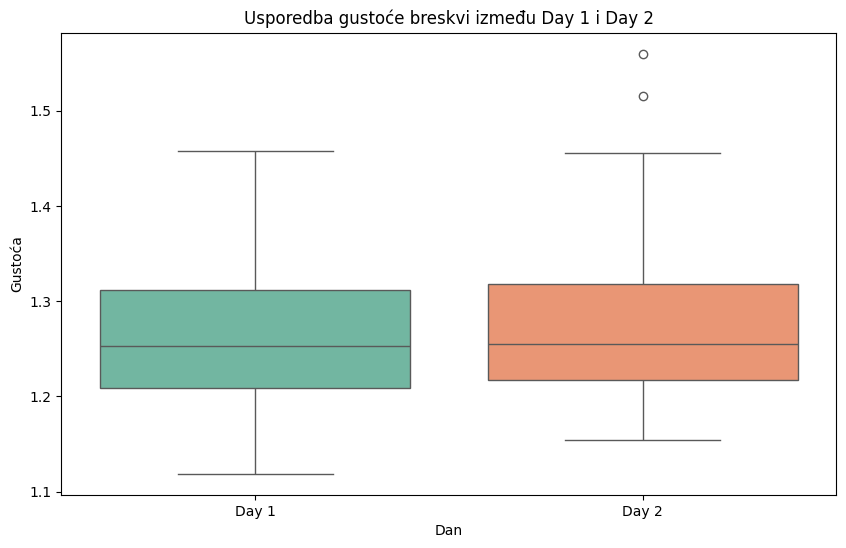

In [12]:
# Box plot za usporedbu gustoće između day1 i day2
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='Density', data=pd.concat([day1_data.assign(day='Day 1'), day2_data.assign(day='Day 2')]), palette='Set2')
plt.title('Usporedba gustoće breskvi između Day 1 i Day 2')
plt.xlabel('Dan')
plt.ylabel('Gustoća')
plt.show()


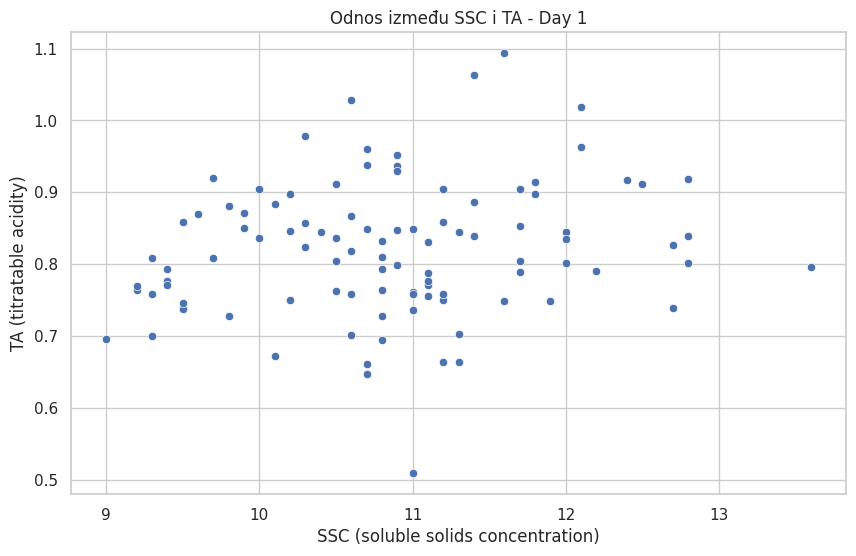

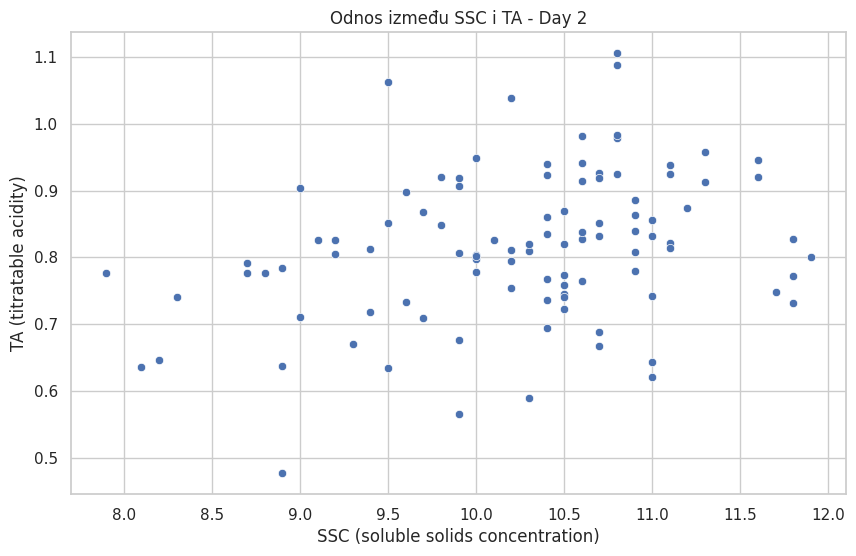

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot SSC vs TA za day1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TST', y='TA', data=day1_data)
plt.title('Odnos između SSC i TA - Day 1')
plt.xlabel('SSC (soluble solids concentration)')
plt.ylabel('TA (titratable acidity)')
plt.show()

# Scatter plot SSC vs TA za day2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TST', y='TA', data=day2_data)
plt.title('Odnos između SSC i TA - Day 2')
plt.xlabel('SSC (soluble solids concentration)')
plt.ylabel('TA (titratable acidity)')
plt.show()


/tmp/ipykernel_9317/4035720333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='Firmness', data=pd.concat([day1_data.assign(day='Day 1'), day2_data.assign(day='Day 2')]), palette='Set2')


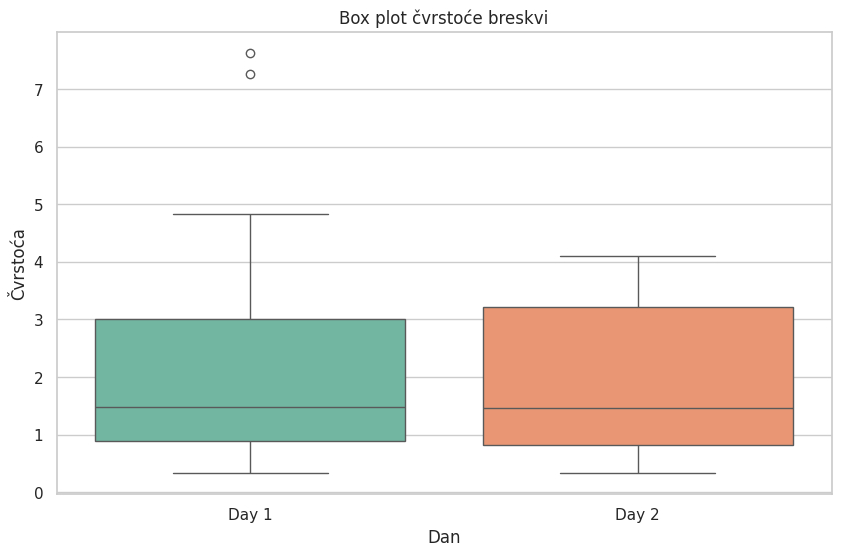

In [40]:
# Box plot čvrstoće za day1
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='Firmness', data=pd.concat([day1_data.assign(day='Day 1'), day2_data.assign(day='Day 2')]), palette='Set2')
plt.title('Box plot čvrstoće breskvi')
plt.xlabel('Dan')
plt.ylabel('Čvrstoća')
plt.show()


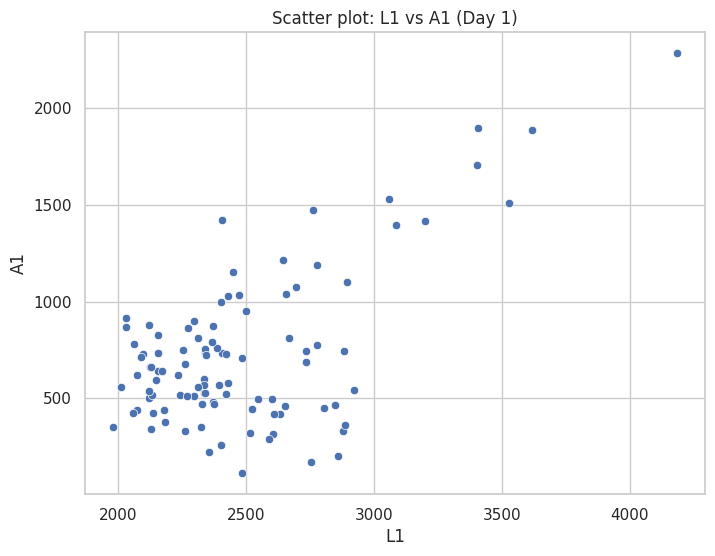

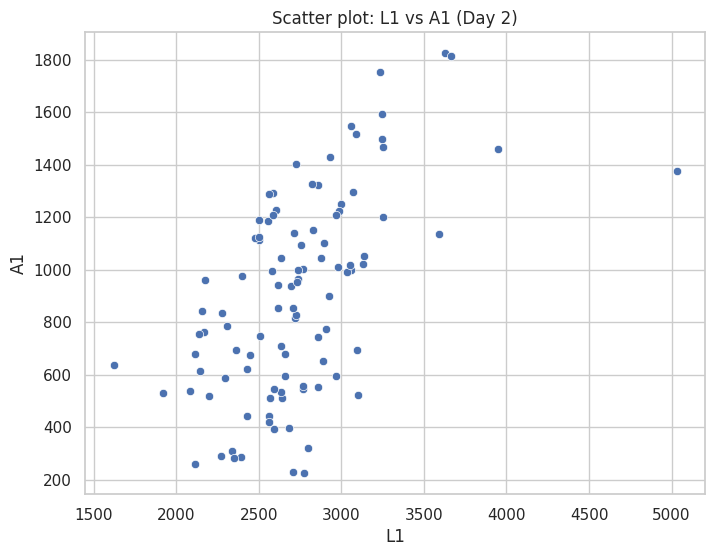

In [61]:
# Scatter plot L1 vs A1 za day1_data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='L1', y='A1', data=day1_data)
plt.title('Scatter plot: L1 vs A1 (Day 1)')
plt.xlabel('L1')
plt.ylabel('A1')
plt.show()

# Scatter plot L1 vs A1 za day2_data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='L1', y='A1', data=day2_data)
plt.title('Scatter plot: L1 vs A1 (Day 2)')
plt.xlabel('L1')
plt.ylabel('A1')
plt.show()

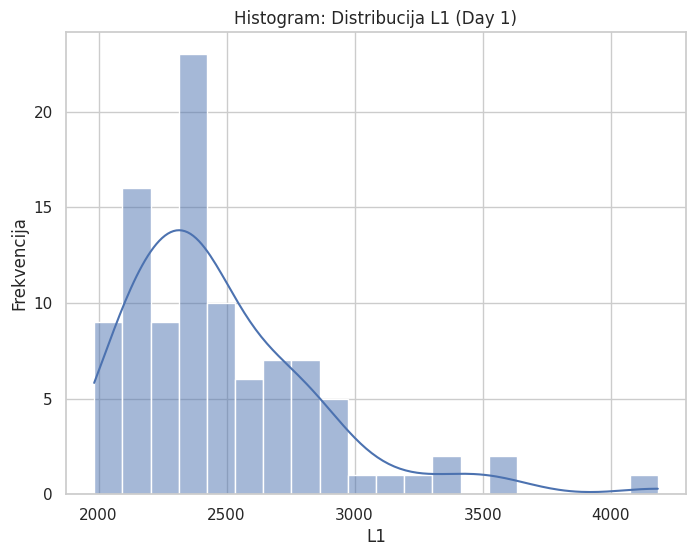

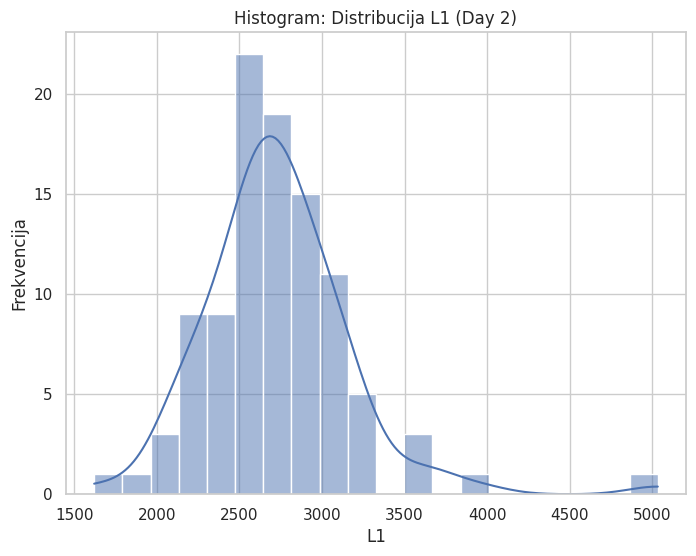

In [62]:
# Histogram za L1 u day1_data
plt.figure(figsize=(8, 6))
sns.histplot(day1_data['L1'], bins=20, kde=True)
plt.title('Histogram: Distribucija L1 (Day 1)')
plt.xlabel('L1')
plt.ylabel('Frekvencija')
plt.show()

# Histogram za L1 u day2_data
plt.figure(figsize=(8, 6))
sns.histplot(day2_data['L1'], bins=20, kde=True)
plt.title('Histogram: Distribucija L1 (Day 2)')
plt.xlabel('L1')
plt.ylabel('Frekvencija')
plt.show()


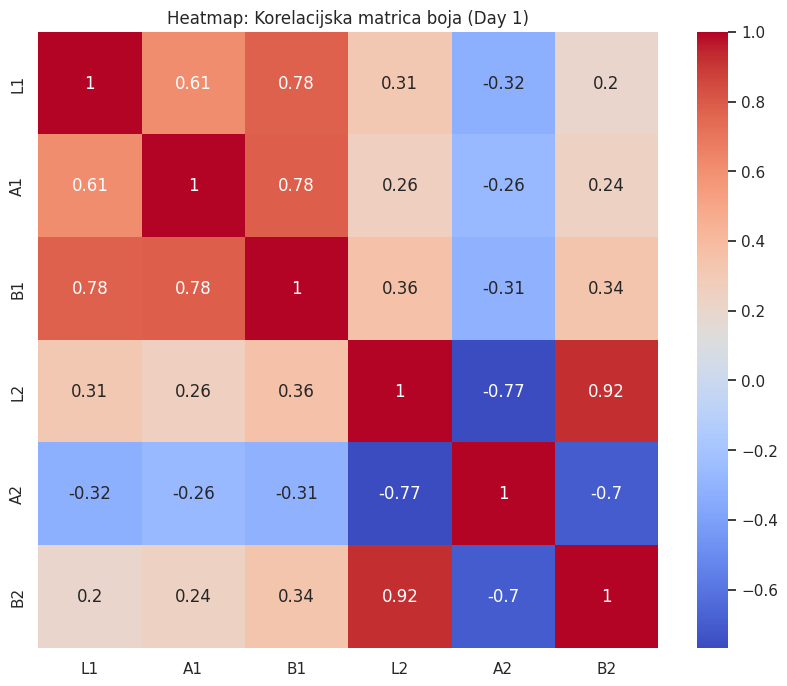

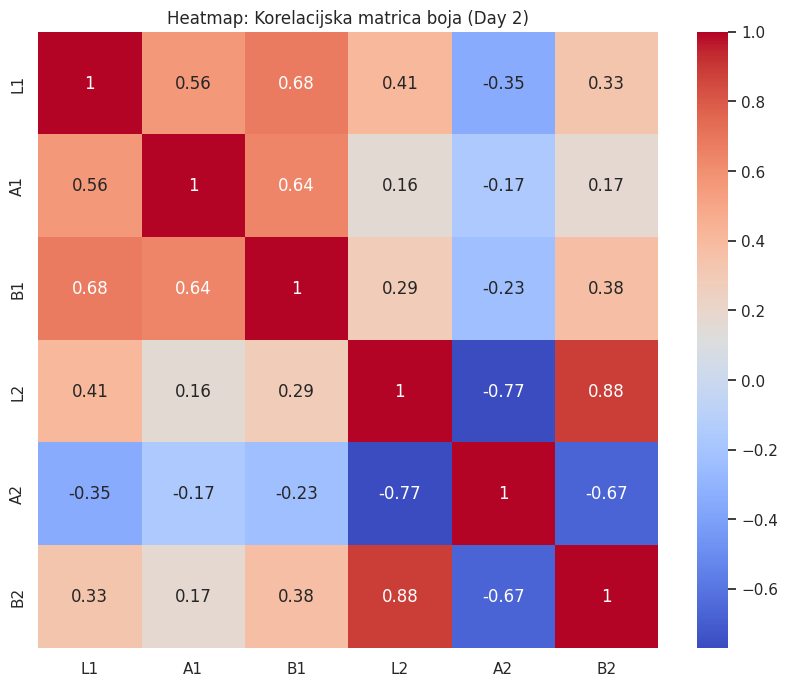

In [64]:
# Korelacijska matrica za day1_data
corr_matrix_day1 = day1_data[['L1', 'A1', 'B1', 'L2', 'A2', 'B2']].corr()

# Heatmap korelacija za day1_data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_day1, annot=True, cmap='coolwarm')
plt.title('Heatmap: Korelacijska matrica boja (Day 1)')
plt.show()

# Korelacijska matrica za day2_data
corr_matrix_day2 = day2_data[['L1', 'A1', 'B1', 'L2', 'A2', 'B2']].corr()

# Heatmap korelacija za day2_data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_day2, annot=True, cmap='coolwarm')
plt.title('Heatmap: Korelacijska matrica boja (Day 2)')
plt.show()


Korelacijska matrica za Day 1:
            Number    volume      mass  Firmness       TST        TA  \
Number    1.000000 -0.266459 -0.072095  0.025614 -0.022229 -0.024453   
volume   -0.266459  1.000000 -0.056076 -0.043305  0.071203 -0.024053   
mass     -0.072095 -0.056076  1.000000  0.072376 -0.005239 -0.166735   
Firmness  0.025614 -0.043305  0.072376  1.000000 -0.224494 -0.108781   
TST      -0.022229  0.071203 -0.005239 -0.224494  1.000000  0.169813   
TA       -0.024453 -0.024053 -0.166735 -0.108781  0.169813  1.000000   
Zs       -0.329280  0.163636  0.140700  0.651339 -0.021209 -0.160199   
θ         0.327529 -0.142660 -0.176529 -0.682297  0.169942  0.159989   
L1        0.216269 -0.127136 -0.176898  0.190724 -0.318297  0.172538   
A1       -0.402721 -0.001825 -0.049370  0.177764 -0.170935  0.198636   
B1       -0.149383 -0.115343 -0.159699  0.273115 -0.191353  0.167029   
L2       -0.109719  0.123228  0.085967  0.249387 -0.202624  0.010533   
A2        0.162636 -0.037028  0.0

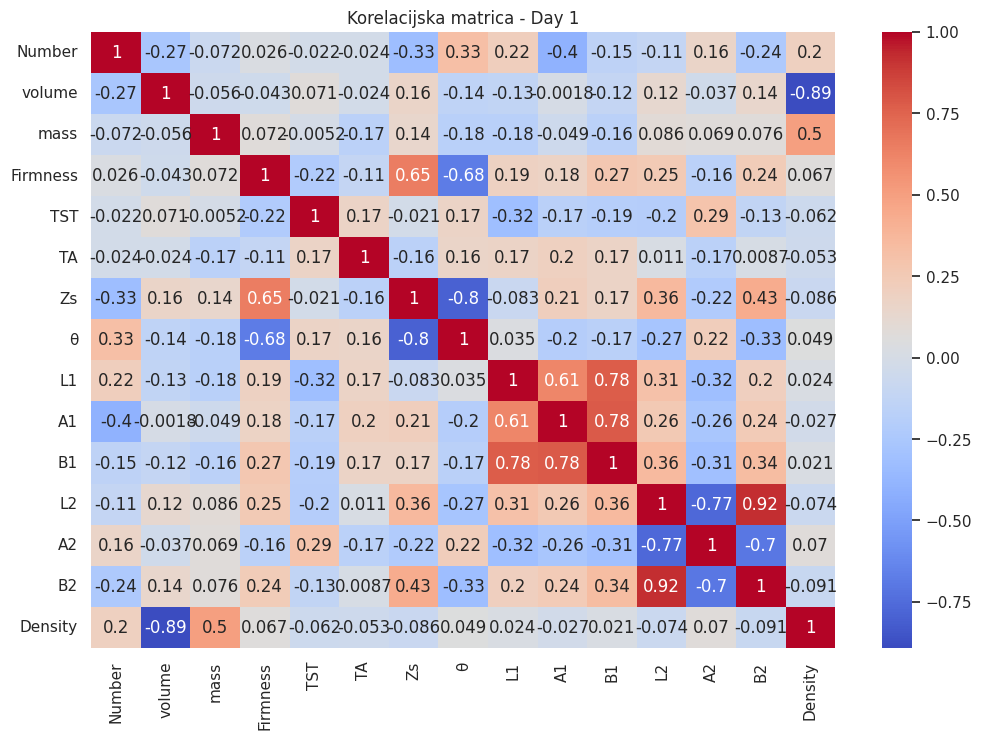

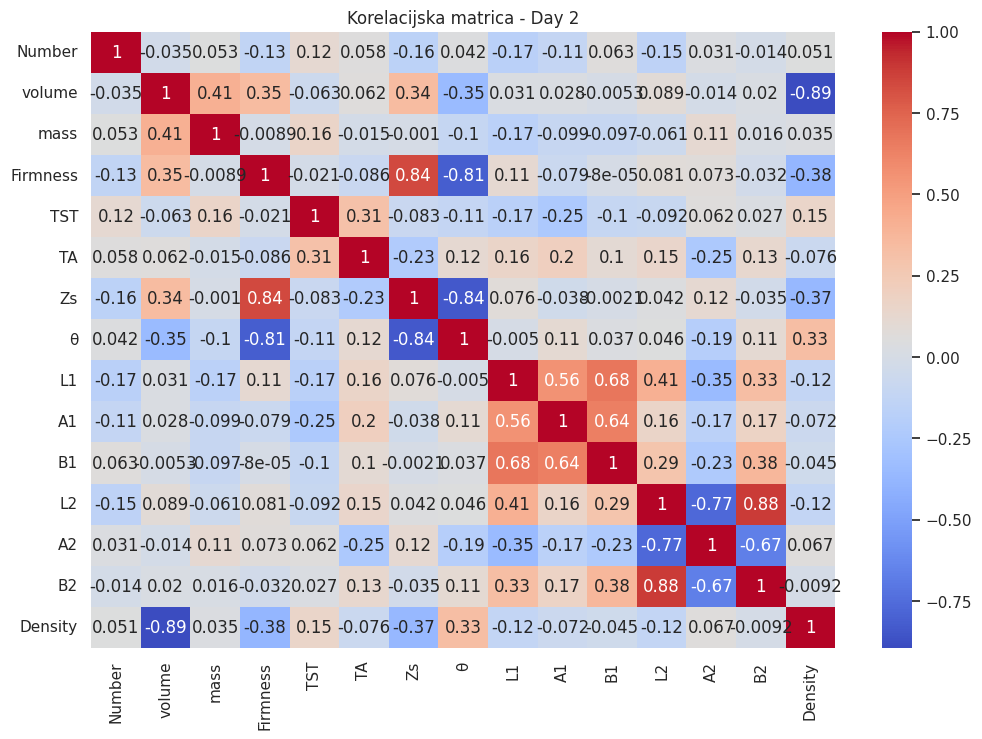

In [48]:
# Uklanjamo stupac 'day' iz DataFrame-a prije računanja korelacijske matrice
day1_data_numeric = day1_data.drop(columns=['day'])
day2_data_numeric = day2_data.drop(columns=['day'])

# Računanje korelacijske matrice za day1_data i day2_data
corr_matrix_day1 = day1_data_numeric.corr()
corr_matrix_day2 = day2_data_numeric.corr()

# Ispis korelacijskih matrica
print("Korelacijska matrica za Day 1:")
print(corr_matrix_day1)

print("\nKorelacijska matrica za Day 2:")
print(corr_matrix_day2)

# Heatmapa korelacija za day1_data
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_day1, annot=True, cmap='coolwarm')
plt.title('Korelacijska matrica - Day 1')
plt.show()

# Heatmapa korelacija za day2_data
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_day2, annot=True, cmap='coolwarm')
plt.title('Korelacijska matrica - Day 2')
plt.show()


In [65]:
from scipy.stats import ttest_ind


# T-test za gustoću za day1_data i day2_data
t_stat_day1, p_val_day1 = ttest_ind(day1_data['Density'], day2_data['Density'])
print(f'T-test za gustoću (Day 1 vs Day 2): t-stat={t_stat_day1}, p-val={p_val_day1}')


T-test za gustoću (Day 1 vs Day 2): t-stat=-0.8112997468233222, p-val=0.4181677356458464
